In [39]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Read the CSV file
df = pd.read_csv("/content/fake_job_postings 123.csv")



In [3]:

# Display the first 5 examples in the dataset
print(df.head())



   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [33]:
# Select specific columns
df = df[['title', 'location','company_profile', 'requirements', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function','salary_range',
       'fraudulent']]

# Check for missing values
print(df.isna().apply(pd.value_counts))
print(df.isnull().sum())


       title  location  company_profile  requirements  telecommuting  \
False   2105      2105             2105          2105           2105   

       has_company_logo  has_questions  employment_type  required_experience  \
False              2105           2105             2105                 2105   

       required_education  industry  function  salary_range  fraudulent  
False                2105      2105      2105          2105        2105  
title                  0
location               0
company_profile        0
requirements           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
salary_range           0
fraudulent             0
dtype: int64


In [34]:

# Remove duplicates
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())



1355
0


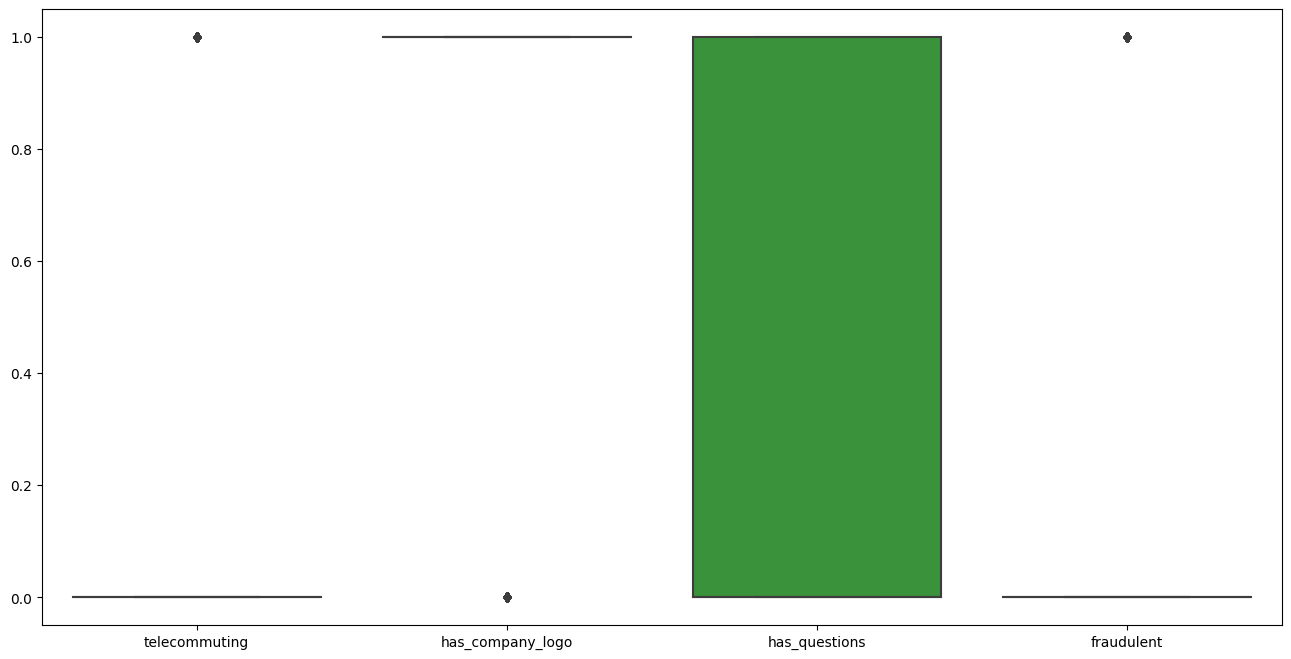

In [4]:
# Select numeric and categorical columns
df_num = df[['telecommuting','has_company_logo','has_questions','fraudulent','salary_range']]
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]

# Visualize numeric data
plt.figure(figsize=[16,8])
sb.boxplot(data=df_num)
plt.show()



In [5]:
# Filter numeric data
df_num = df_num[df_num['telecommuting'] < 0.9 ]
df_num = df_num[df_num['fraudulent'] < 0.9 ]
df_num = df_num[df_num['has_company_logo'] > 0.1 ]

# Handle missing values
print(df.isnull().sum())
df.dropna(axis=0, how='any', inplace=True)
print(df.isnull().sum())
print(df.shape)


job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64
job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64
(7

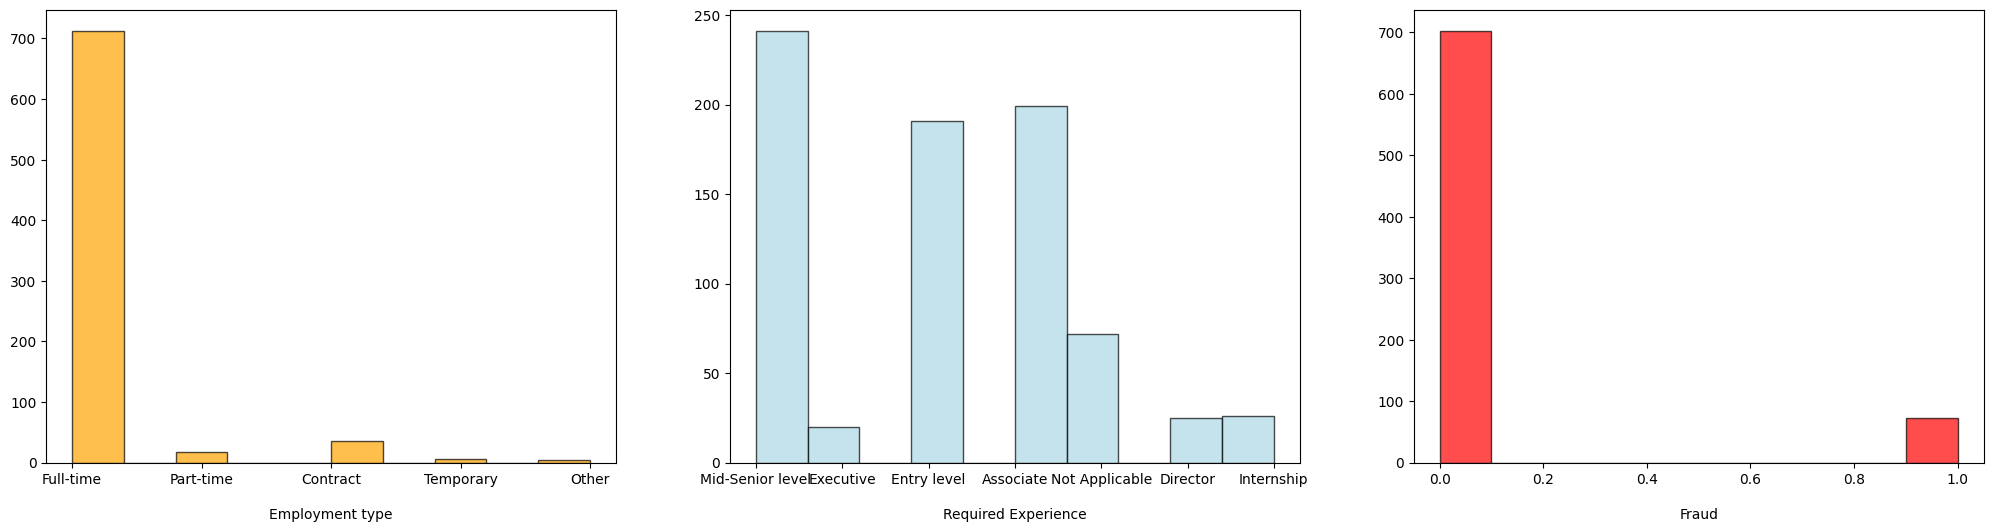

In [6]:

# Visualize categorical data
plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
plt.hist(df.employment_type, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('\nEmployment type')

plt.subplot(3,3,2)
plt.hist(df.required_experience, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('\nRequired Experience')

plt.subplot(3,3,3)
plt.hist(df.fraudulent, color='red', edgecolor='black', alpha=0.7)
plt.xlabel('\nFraud')

plt.show()



(645, 18)


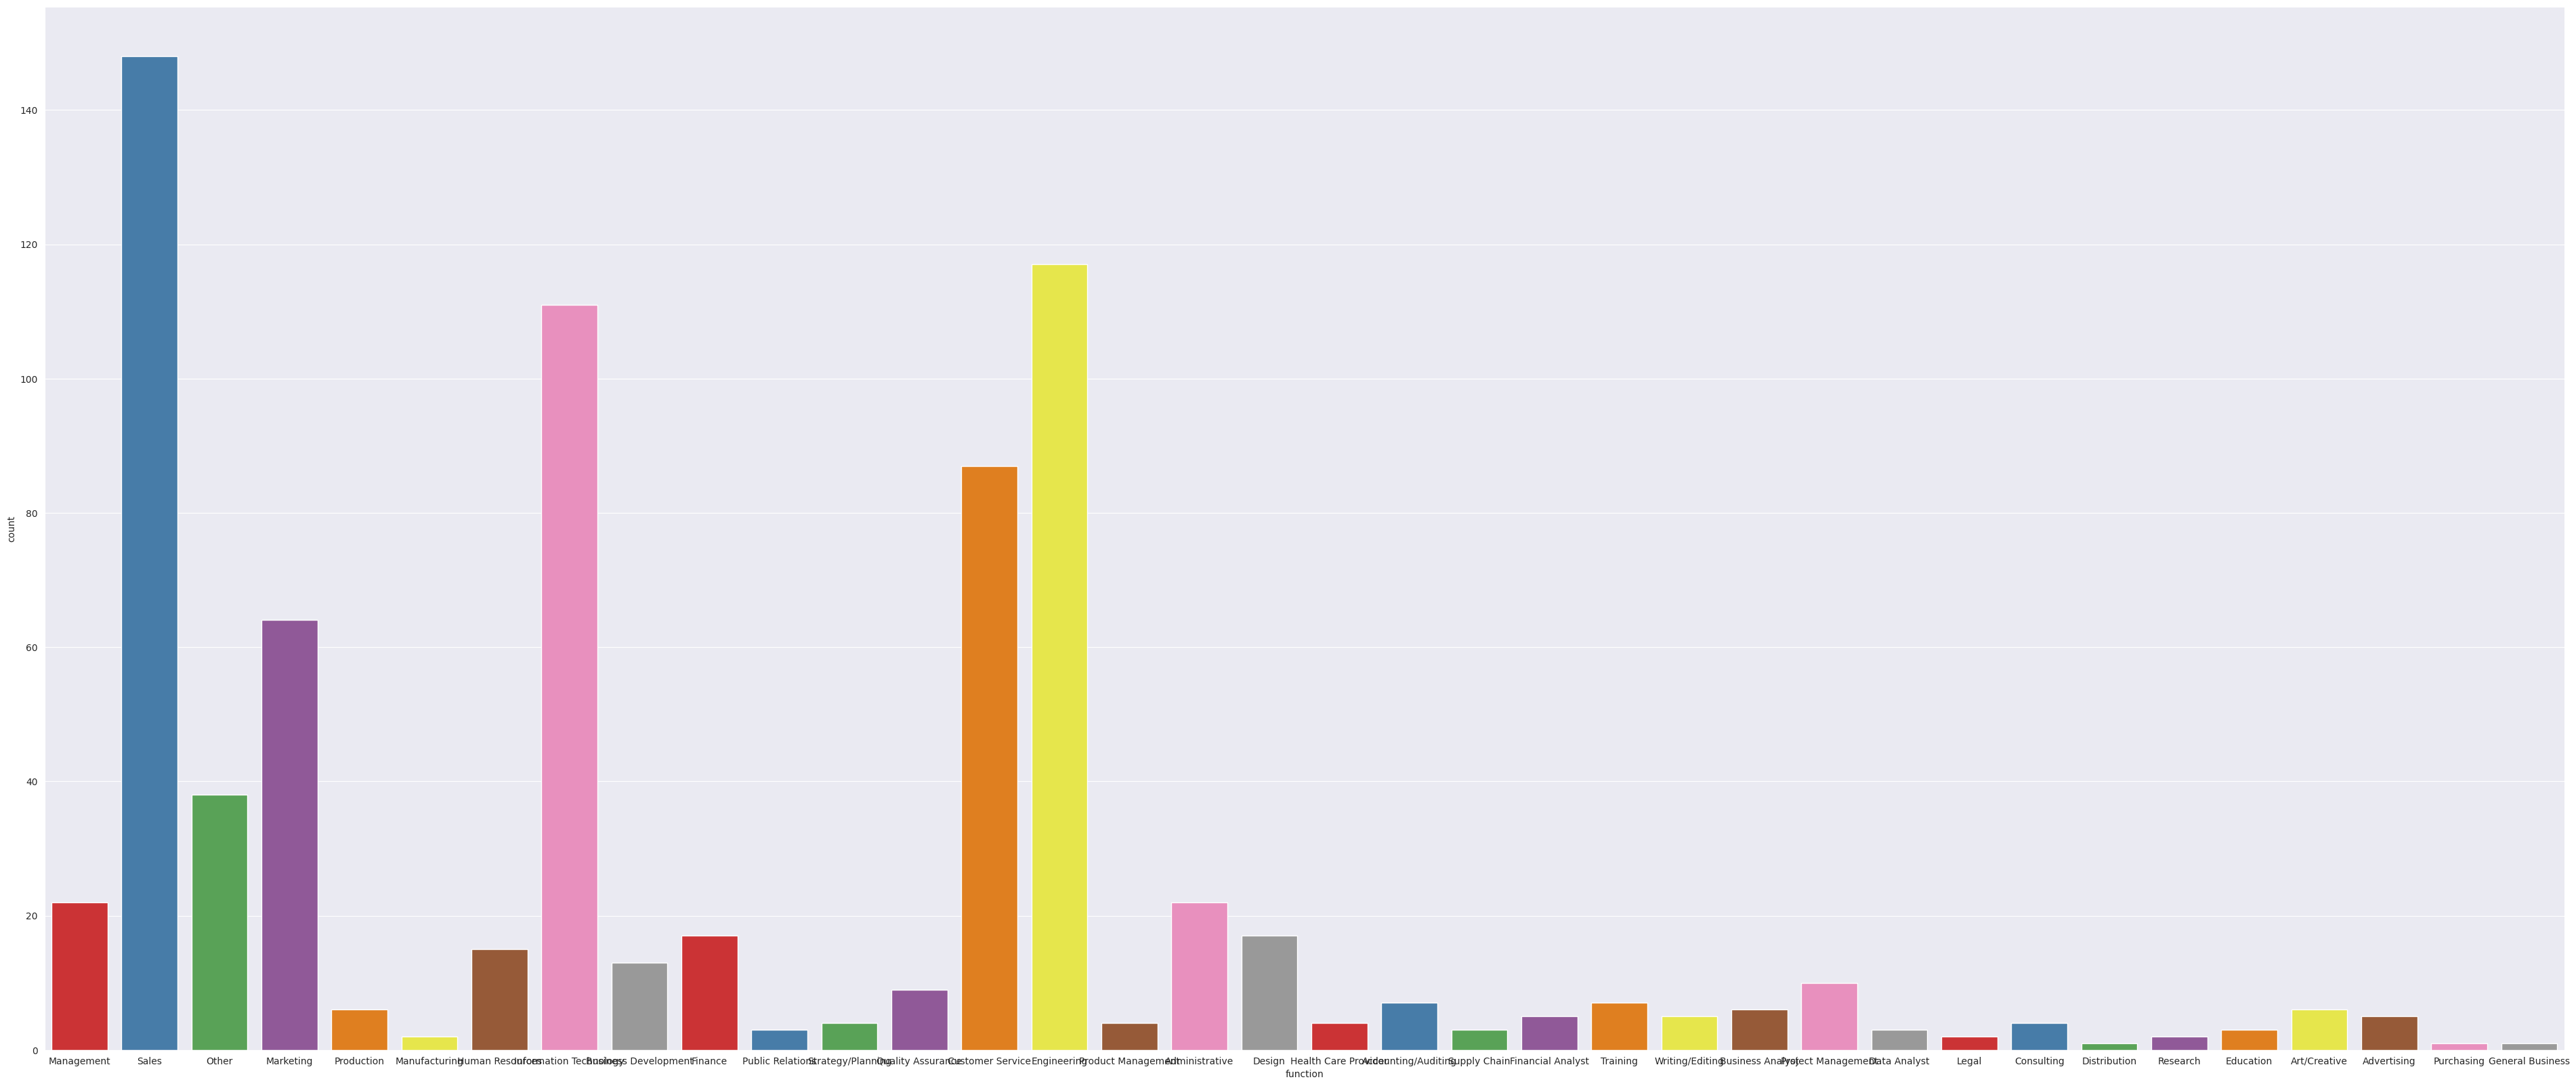

In [7]:
# Additional visualization
plt.figure(figsize=(48,20))
sb.set_style("darkgrid")
sb.countplot(x='function', data=df, palette='Set1')
df_jobs = df[(df['employment_type'] == 'Full-time') & (df['fraudulent']== 0)]
print(df_jobs.shape)


In [36]:

# Checking the counts of each unique value in 'title'
print(df_jobs['title'].value_counts())


Systems Engineers/Network Administrators/Tiers I-III             8
Customer Service Representative                                  7
Technical Support Associate                                      7
Sales, Assistant Manager & Market Manager Positions Available    7
Marketing Associate                                              5
                                                                ..
Clinical Account Manager                                         1
Analyst / Software Engineer                                      1
Web Developer Java/GWT                                           1
Sales Support                                                    1
Portfolio Development Associate - Paris & rest of France         1
Name: title, Length: 521, dtype: int64


In [35]:

# Maximum count in 'title'
print(df_jobs['title'].value_counts().max())



8


In [37]:
# Displaying the first row of the DataFrame
print(df.head(1))



   title  location  company_profile  requirements  telecommuting  \
0    138       133               71           288              1   

   has_company_logo  has_questions  employment_type  required_experience  \
0                 1              0                1                    2   

   required_education  industry  function  salary_range  fraudulent  
0                   3        55         7           139           1  


In [38]:
# Filtering the DataFrame for fraudulent entries
df_industry = df[df['fraudulent'] == 1]
print(df_industry.shape)



(70, 14)


In [12]:
# Checking counts of unique values in the 'industry' column for fraudulent entries
print(df_industry['industry'].value_counts())



Oil & Energy                            17
Real Estate                             10
Consumer Services                        8
Financial Services                       6
Computer & Network Security              5
Hospital & Health Care                   4
Management Consulting                    3
Retail                                   3
Insurance                                2
Telecommunications                       2
Human Resources                          2
Transportation/Trucking/Railroad         2
Construction                             1
Security and Investigations              1
Warehousing                              1
Logistics and Supply Chain               1
Accounting                               1
Information Services                     1
Mechanical or Industrial Engineering     1
Computer Networking                      1
Name: industry, dtype: int64


In [13]:
# Checking counts of 'fraudulent' values
print(df['fraudulent'].value_counts())



0    702
1     72
Name: fraudulent, dtype: int64


In [14]:
# Extracting values from the 'fraudulent' column
print(df['fraudulent'].values)



[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [15]:
# Separating fraudulent and non-fraudulent entries
fraud = df[df['fraudulent'] == 1]
print(fraud.shape)

not_fraud = df[df['fraudulent'] == 0]
print(not_fraud.shape)


(72, 18)
(702, 18)


In [16]:

# Balancing the dataset by sampling the same number of fraudulent entries as non-fraudulent ones
fraud = fraud.sample(1403, replace=True)
print(fraud.shape, not_fraud.shape)


(1403, 18) (702, 18)


In [17]:

# Combining fraudulent and non-fraudulent entries into a new DataFrame
df = fraud.append(not_fraud)
df.reset_index(inplace=True)


<ipython-input-17-bda44e33ab32>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = fraud.append(not_fraud)


In [18]:

# Encoding categorical features using LabelEncoder
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['requirements'] = le.fit_transform(df['requirements'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])
df['salary_range'] = le.fit_transform(df['salary_range'])



In [19]:
# Splitting the data into features (X) and target variable (Y)
X = df[['index', 'title', 'location', 'company_profile', 'requirements',
        'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
        'required_experience', 'required_education', 'industry', 'function',
        'salary_range']].values
Y = df[['fraudulent']].values

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)



(1578, 14) (527, 14) (1578, 1) (527, 1)


In [20]:
# Logistic Regression
LgR = LogisticRegression()
LgR.fit(X_train, Y_train)
Y_pred_lgr = LgR.predict(X_test)
Y_test_lgr = Y_test.flatten()
Y_pred_lgr = Y_pred_lgr.flatten()
print(Y_test_lgr.shape, Y_pred_lgr.shape)



(527,) (527,)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Creating a DataFrame for Logistic Regression results
df_lgr = pd.DataFrame({'Y_test': Y_test_lgr, 'Y_pred': Y_pred_lgr})
print(df_lgr)

# Calculating and printing accuracy for Logistic Regression
accuracy_lgr = accuracy_score(Y_pred_lgr, Y_test_lgr)
print(f"Logistic Regression Accuracy: {accuracy_lgr}")


     Y_test  Y_pred
0         1       1
1         1       0
2         0       1
3         0       1
4         1       1
..      ...     ...
522       1       1
523       0       0
524       1       1
525       1       1
526       1       1

[527 rows x 2 columns]
Logistic Regression Accuracy: 0.7020872865275142


In [22]:

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
Y_test_knn = Y_test.flatten()
Y_pred_knn = Y_pred_knn.flatten()
print(Y_test_knn.shape, Y_pred_knn.shape)

# Creating a DataFrame for KNN results
df_knn = pd.DataFrame({'Y_test': Y_test_knn, 'Y_pred': Y_pred_knn})
print(df_knn)

# Calculating and printing accuracy for KNN
accuracy_knn = accuracy_score(Y_pred_knn, Y_test_knn)
print(f"KNN Accuracy: {accuracy_knn}")



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


(527,) (527,)
     Y_test  Y_pred
0         1       1
1         1       1
2         0       0
3         0       0
4         1       1
..      ...     ...
522       1       1
523       0       0
524       1       1
525       1       1
526       1       1

[527 rows x 2 columns]
KNN Accuracy: 0.920303605313093


In [23]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(X_train, Y_train)
Y_pred_rfc = rfc.predict(X_test)
Y_test_rfc = Y_test.flatten()
Y_pred_rfc = Y_pred_rfc.flatten()
print(Y_test_rfc.shape, Y_pred_rfc.shape)

# Creating a DataFrame for Random Forest Classifier results
df_rfc = pd.DataFrame({'Y_test': Y_test_rfc, 'Y_pred': Y_pred_rfc})
print(df_rfc)

# Calculating and printing accuracy for Random Forest Classifier
accuracy_rfc = accuracy_score(Y_pred_rfc, Y_test_rfc)
print(f"Random Forest Classifier Accuracy: {accuracy_rfc}")

(527,) (527,)
     Y_test  Y_pred
0         1       1
1         1       1
2         0       0
3         0       0
4         1       1
..      ...     ...
522       1       1
523       0       0
524       1       1
525       1       1
526       1       1

[527 rows x 2 columns]
Random Forest Classifier Accuracy: 0.9943074003795066


<ipython-input-23-a0afb7cfb637>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

# For Logistic Regression
precision_lgr = precision_score(Y_test_lgr, Y_pred_lgr)
recall_lgr = recall_score(Y_test_lgr, Y_pred_lgr)
f1_lgr = f1_score(Y_test_lgr, Y_pred_lgr)

# For K-Nearest Neighbors
precision_knn = precision_score(Y_test_knn, Y_pred_knn)
recall_knn = recall_score(Y_test_knn, Y_pred_knn)
f1_knn = f1_score(Y_test_knn, Y_pred_knn)

# For Random Forest Classifier
precision_rfc = precision_score(Y_test_rfc, Y_pred_rfc)
recall_rfc = recall_score(Y_test_rfc, Y_pred_rfc)
f1_rfc = f1_score(Y_test_rfc, Y_pred_rfc)

# Print the scores for each model
print(f"Logistic Regression Precision: {precision_lgr}, Recall: {recall_lgr}, F1: {f1_lgr}")
print(f"K-Nearest Neighbors Precision: {precision_knn}, Recall: {recall_knn}, F1: {f1_knn}")
print(f"Random Forest Precision: {precision_rfc}, Recall: {recall_rfc}, F1: {f1_rfc}")


Logistic Regression Precision: 0.7352941176470589, Recall: 0.8595988538681948, F1: 0.7926023778071334
K-Nearest Neighbors Precision: 0.8925831202046036, Recall: 1.0, F1: 0.9432432432432432
Random Forest Precision: 0.9914772727272727, Recall: 1.0, F1: 0.9957203994293866


In [25]:
from sklearn.metrics import confusion_matrix


In [26]:
y_pred_lgr = LgR.predict(X_test)  # Logistic Regression predictions
y_pred_knn = knn.predict(X_test)  # K-Nearest Neighbors predictions
y_pred_rfc = rfc.predict(X_test)  # Random Forest predictions


In [27]:
cm_lgr = confusion_matrix(Y_test, y_pred_lgr)
cm_knn = confusion_matrix(Y_test, y_pred_knn)
cm_rfc = confusion_matrix(Y_test, y_pred_rfc)


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

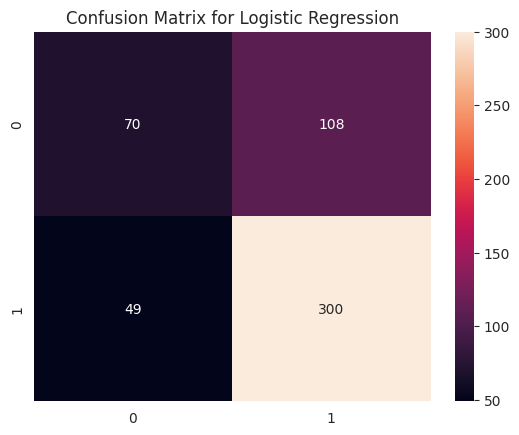

In [28]:
import seaborn as sns
ax = sns.heatmap(cm_lgr, annot=True, fmt="d")
ax.set_title('Confusion Matrix for Logistic Regression')


Text(0.5, 1.0, 'Confusion Matrix for KNN')

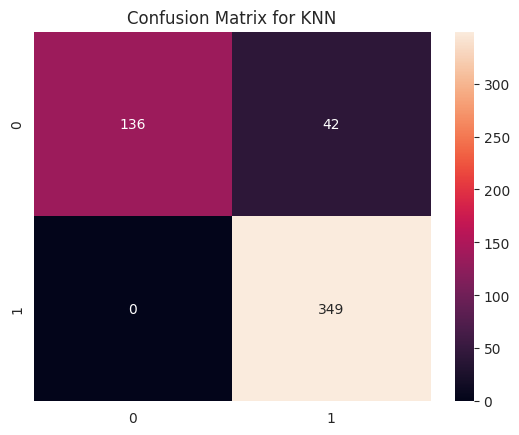

In [29]:
ax = sns.heatmap(cm_knn, annot=True, fmt="d")
ax.set_title('Confusion Matrix for KNN')

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

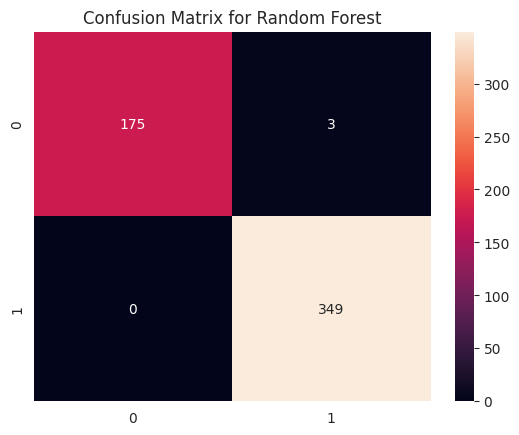

In [30]:
ax = sns.heatmap(cm_rfc, annot=True, fmt="d")
ax.set_title('Confusion Matrix for Random Forest')

In [31]:
from sklearn.model_selection import GridSearchCV


# Define hyperparameter grid for Random Forest Classifier
param_grid_rfc = {'n_estimators': [10, 50, 100, 200],
                  'max_depth': [None, 10, 20, 30],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4]}

# Initialize Random Forest Classifier model
rfc = RandomForestClassifier()

# Create GridSearchCV object for Random Forest Classifier
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv=5, scoring='accuracy')

# Fit the data to find the best hyperparameters
grid_search_rfc.fit(X_train, Y_train)

# Display the best hyperparameters
print("Best Hyperparameters for Random Forest Classifier:", grid_search_rfc.best_params_)

# Get the best model
best_rfc = grid_search_rfc.best_estimator_

# Use the best model for prediction
Y_pred_rfc_grid = best_rfc.predict(X_test)

# Calculate and print accuracy for Random Forest Classifier with Grid Search
accuracy_rfc_grid = accuracy_score(Y_pred_rfc_grid, Y_test.flatten())
print(f"Random Forest Classifier Accuracy (Grid Search): {accuracy_rfc_grid}")

from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameter grid for K-Nearest Neighbors
param_grid_knn = {'

[1, 2]}

# Initialize K-Nearest Neighbors model
knn = KNeighborsClassifier()

# Create GridSearchCV object for K-Nearest Neighbors
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')

# Fit the data to find the best hyperparameters
grid_search_knn.fit(X_train, Y_train)

# Display the best hyperparameters for K-Nearest Neighbors
print("Best Hyperparameters for K-Nearest Neighbors:", grid_search_knn.best_params_)

# Get the best model for K-Nearest Neighbors
best_knn = grid_search_knn.best_estimator_

# Use the best model for prediction
Y_pred_knn_grid = best_knn.predict(X_test)

# Calculate and print accuracy for K-Nearest Neighbors with Grid Search
accuracy_knn_grid = accuracy_score(Y_pred_knn_grid, Y_test.flatten())
print(f"K-Nearest Neighbors Accuracy (Grid Search): {accuracy_knn_grid}")

# Accuracy before and after tuning for K-Nearest Neighbors
accuracy_before_tuning_knn = accuracy_knn
accuracy_after_tuning_knn = accuracy_knn_grid
model_names_knn = ['K-Nearest Neighbors']

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best Hyperparameters for Random Forest Classifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Classifier Accuracy (Grid Search): 0.9981024667931688


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Best Hyperparameters for K-Nearest Neighbors: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
K-Nearest Neighbors Accuracy (Grid Search): 0.9430740037950665


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

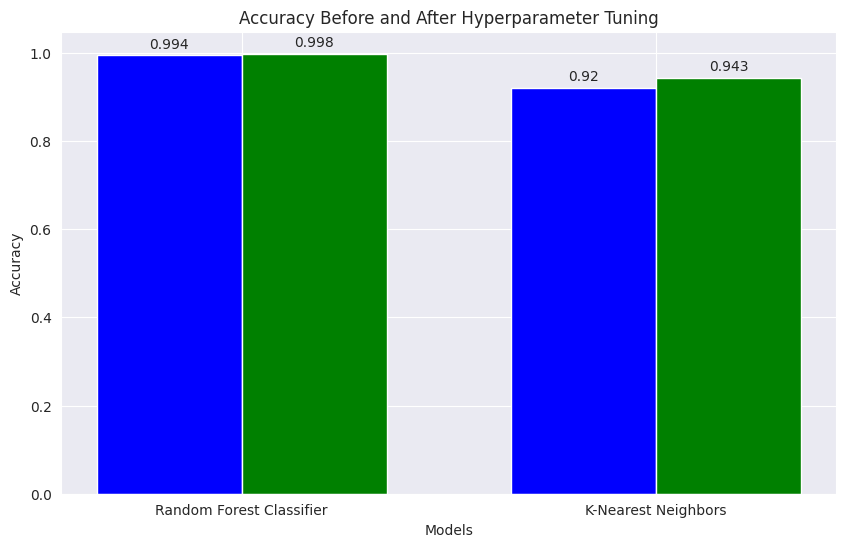

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot bar graph
def plot_accuracy_comparison(before_tuning, after_tuning, model_names):
    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.35
    index = np.arange(len(model_names))

    # Bar plots for accuracy before tuning
    bars_before = plt.bar(index, before_tuning, bar_width, label='Before Tuning', color='b')

    # Bar plots for accuracy after tuning
    bars_after = plt.bar(index + bar_width, after_tuning, bar_width, label='After Tuning', color='g')

    # Add labels, title, and legend
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Before and After Hyperparameter Tuning')
    plt.xticks(index + bar_width / 2, model_names)
    #plt.legend()

    # Display accuracy values on top of the bars
    for bar in bars_before + bars_after:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

    plt.show()
    # Accuracy before and after tuning for Logistic Regression and Random Forest Classifier
accuracy_before_tuning = [accuracy_rfc]
accuracy_after_tuning = [accuracy_rfc_grid]
model_names = ['Random Forest Classifier']

# Plot the bar graph
plot_accuracy_comparison(accuracy_before_tuning + [accuracy_before_tuning_knn],
                         accuracy_after_tuning + [accuracy_after_tuning_knn],
                         model_names + model_names_knn)